In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-behavior-prediction-dataset/marketing_data.csv


### Task 1: Overview of the Dataset
Perform an initial inspection of the dataset to understand its structure, size, and basic statistics.


In [2]:
# Load the dataset
import pandas as pd

df = pd.read_csv('/kaggle/input/marketing-behavior-prediction-dataset/marketing_data.csv')

# Display the first few rows
display(df.head())

# Display dataset info
df.info()

# Display summary statistics
df.describe(include='all')


,User_ID,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,...,coupon,deal,discount,exclusive,limited,new,offer,product,sale,shopping
0,1,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,...,0.570089,0.000000,0.000000,0.000000,0.000000,0.000000,0.593544,0.000000,0.000000,0.0
1,2,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,High,1,...,0.000000,0.563362,0.000000,0.000000,0.000000,0.000000,0.594854,0.000000,0.000000,0.0
2,3,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,Low,1,...,0.000000,0.000000,0.491103,0.000000,0.000000,0.489434,0.000000,0.512291,0.000000,0.0
3,4,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,High,1,...,0.000000,0.000000,0.562483,0.000000,0.582526,0.000000,0.000000,0.586751,0.000000,0.0
4,5,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,...,0.516121,0.000000,0.000000,0.495195,0.000000,0.000000,0.000000,0.000000,0.473183,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 500 non-null    int64  
 1   Likes                   500 non-null    float64
 2   Shares                  500 non-null    float64
 3   Comments                500 non-null    float64
 4   Clicks                  500 non-null    float64
 5   Engagement_with_Ads     500 non-null    float64
 6   Time_Spent_on_Platform  500 non-null    float64
 7   Purchase_History        500 non-null    int64  
 8   Engagement_Level        500 non-null    object 
 9   Purchase_Likelihood     500 non-null    int64  
 10  brand                   500 non-null    float64
 11  buy                     500 non-null    float64
 12  coupon                  500 non-null    float64
 13  deal                    500 non-null    float64
 14  discount                500 non-null    fl

,User_ID,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,...,coupon,deal,discount,exclusive,limited,new,offer,product,sale,shopping
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,250.500000,0.507096,0.501698,0.495660,0.508080,0.491000,0.492899,0.448000,NaN,0.502000,...,0.130940,0.136246,0.137452,0.148840,0.133227,0.136710,0.121888,0.130765,0.154044,0.133298
std,144.481833,0.293279,0.298460,0.275211,0.303279,0.295421,0.288483,0.497787,NaN,0.500497,...,0.251169,0.254150,0.252878,0.267654,0.258666,0.250267,0.247958,0.255580,0.256113,0.257771
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.750000,0.254016,0.231156,0.270000,0.260000,0.233333,0.253356,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.500000,0.494980,0.489950,0.500000,0.500000,0.466667,0.466443,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,375.250000,0.764056,0.773869,0.720000,0.800000,0.733333,0.733221,1.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.461313,0.000000


### Task 2: Check for Missing Values
Identify and quantify missing values in the dataset to determine if imputation or removal is required.


User_ID                   0
Likes                     0
Shares                    0
Comments                  0
Clicks                    0
Engagement_with_Ads       0
Time_Spent_on_Platform    0
Purchase_History          0
Engagement_Level          0
Purchase_Likelihood       0
brand                     0
buy                       0
coupon                    0
deal                      0
discount                  0
exclusive                 0
limited                   0
new                       0
offer                     0
product                   0
sale                      0
shopping                  0
dtype: int64


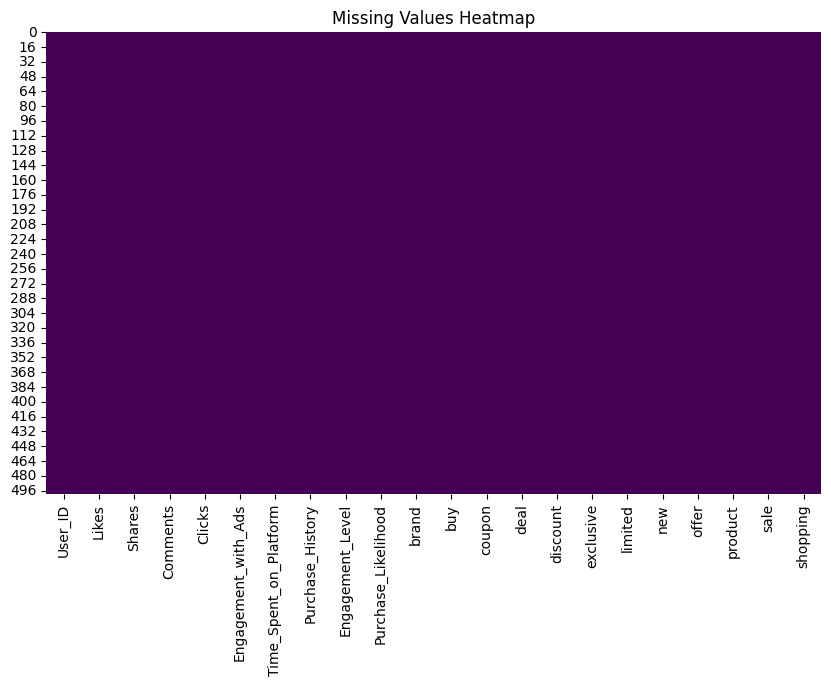

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


### Task 3: Distribution of Numeric Features
Plot histograms or kernel density estimates (KDE) to understand the distribution of numerical features.


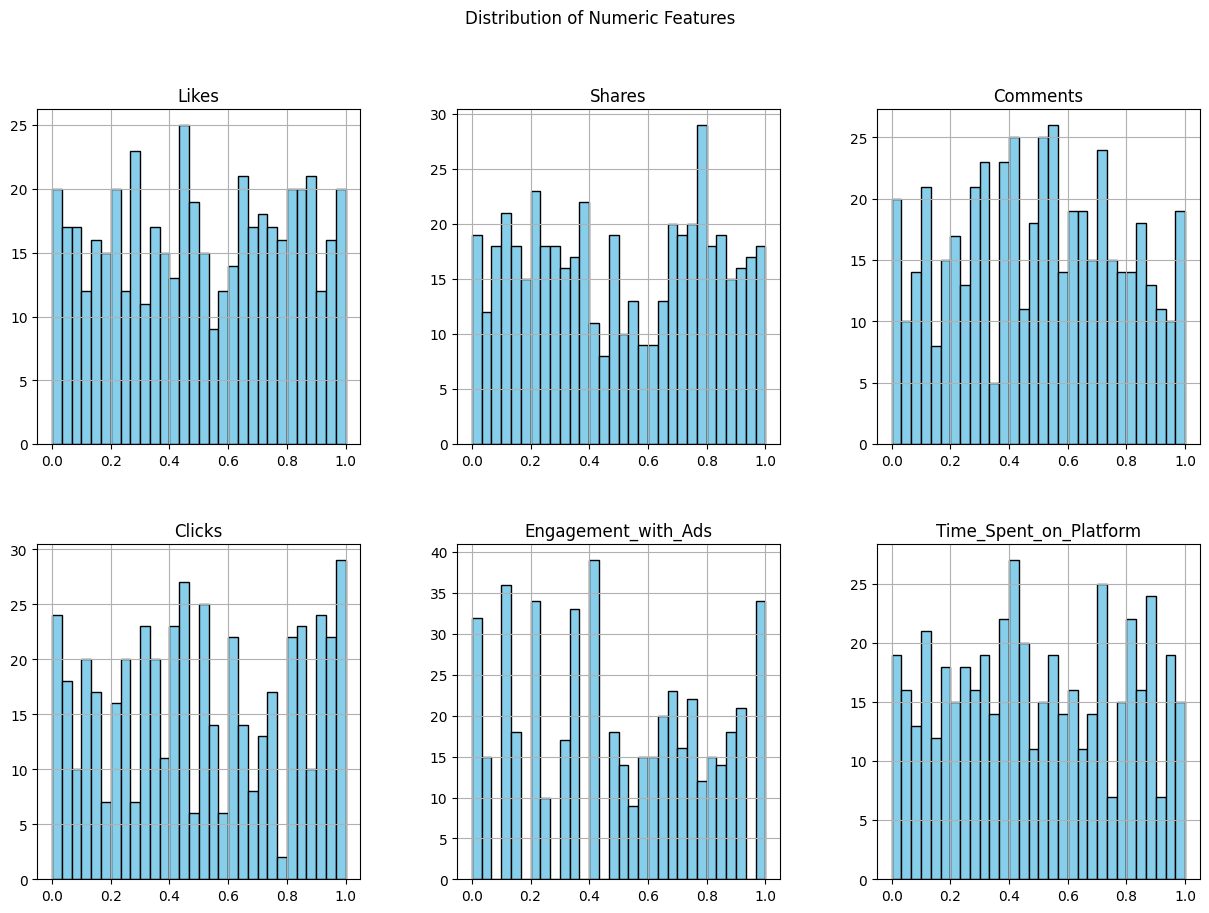

In [4]:
# Plot distribution of numeric features
numeric_cols = ['Likes', 'Shares', 'Comments', 'Clicks', 'Engagement_with_Ads', 'Time_Spent_on_Platform']
df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()


### Task 4: Correlation Matrix
Examine the correlation between numerical variables to identify strong relationships.


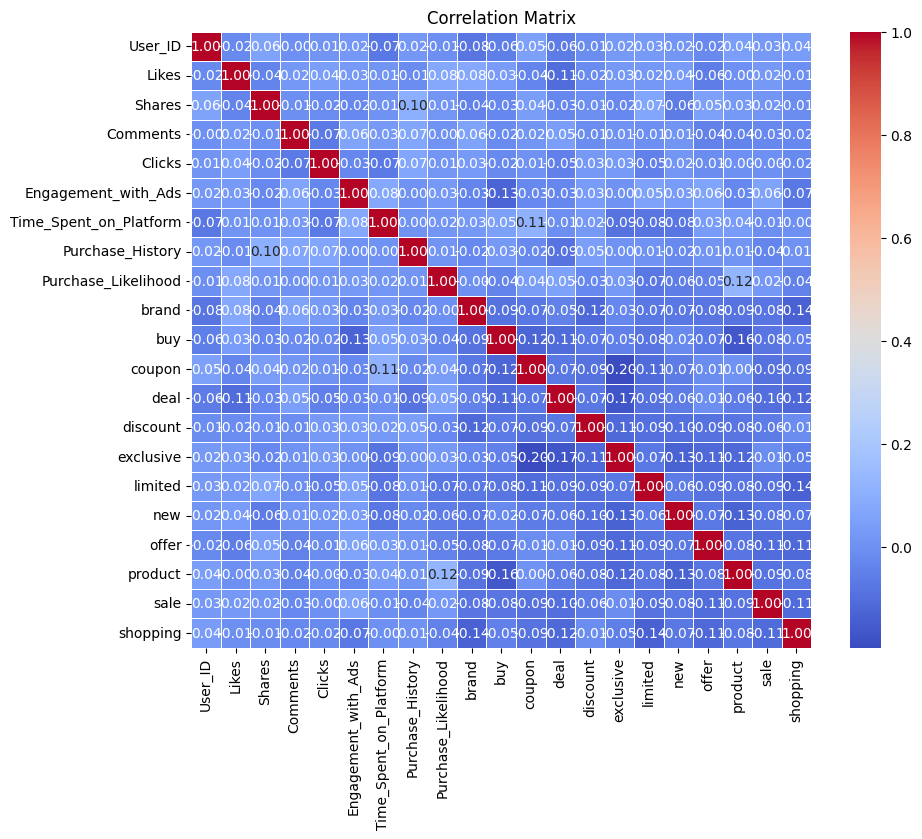

In [5]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Task 5: Analysis of Engagement Levels
Analyze the distribution of the `Engagement_Level` categorical variable to understand user engagement trends.


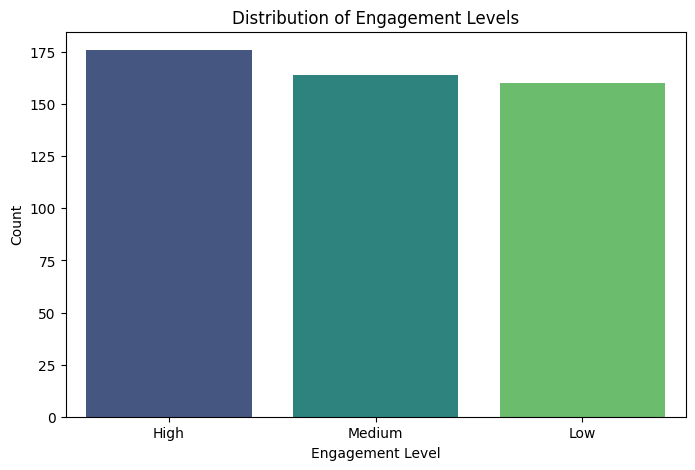

In [6]:
# Plot Engagement Level distribution
engagement_counts = df['Engagement_Level'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=engagement_counts.index, y=engagement_counts.values, palette='viridis')
plt.title('Distribution of Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.show()


### Task 6: Text Features Analysis
Explore the `Text_Features` column using word cloud visualization to identify the most common terms.


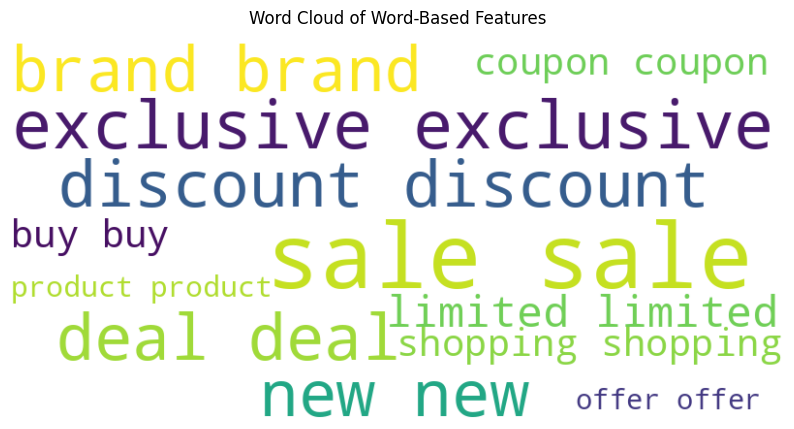

In [7]:
# Combine all word-based columns into a single text representation
text_columns = ['brand', 'buy', 'coupon', 'deal', 'discount', 'exclusive', 
                'limited', 'new', 'offer', 'product', 'sale', 'shopping']

# Generate a combined "text-like" data representation
text_data = ' '.join([col for col in text_columns for _ in range(int(df[col].sum()))])

# Generate a word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Word-Based Features')
plt.show()


### Task 7: Relationship Between Features and Purchase History
Investigate how numerical features relate to the binary `Purchase_History`.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

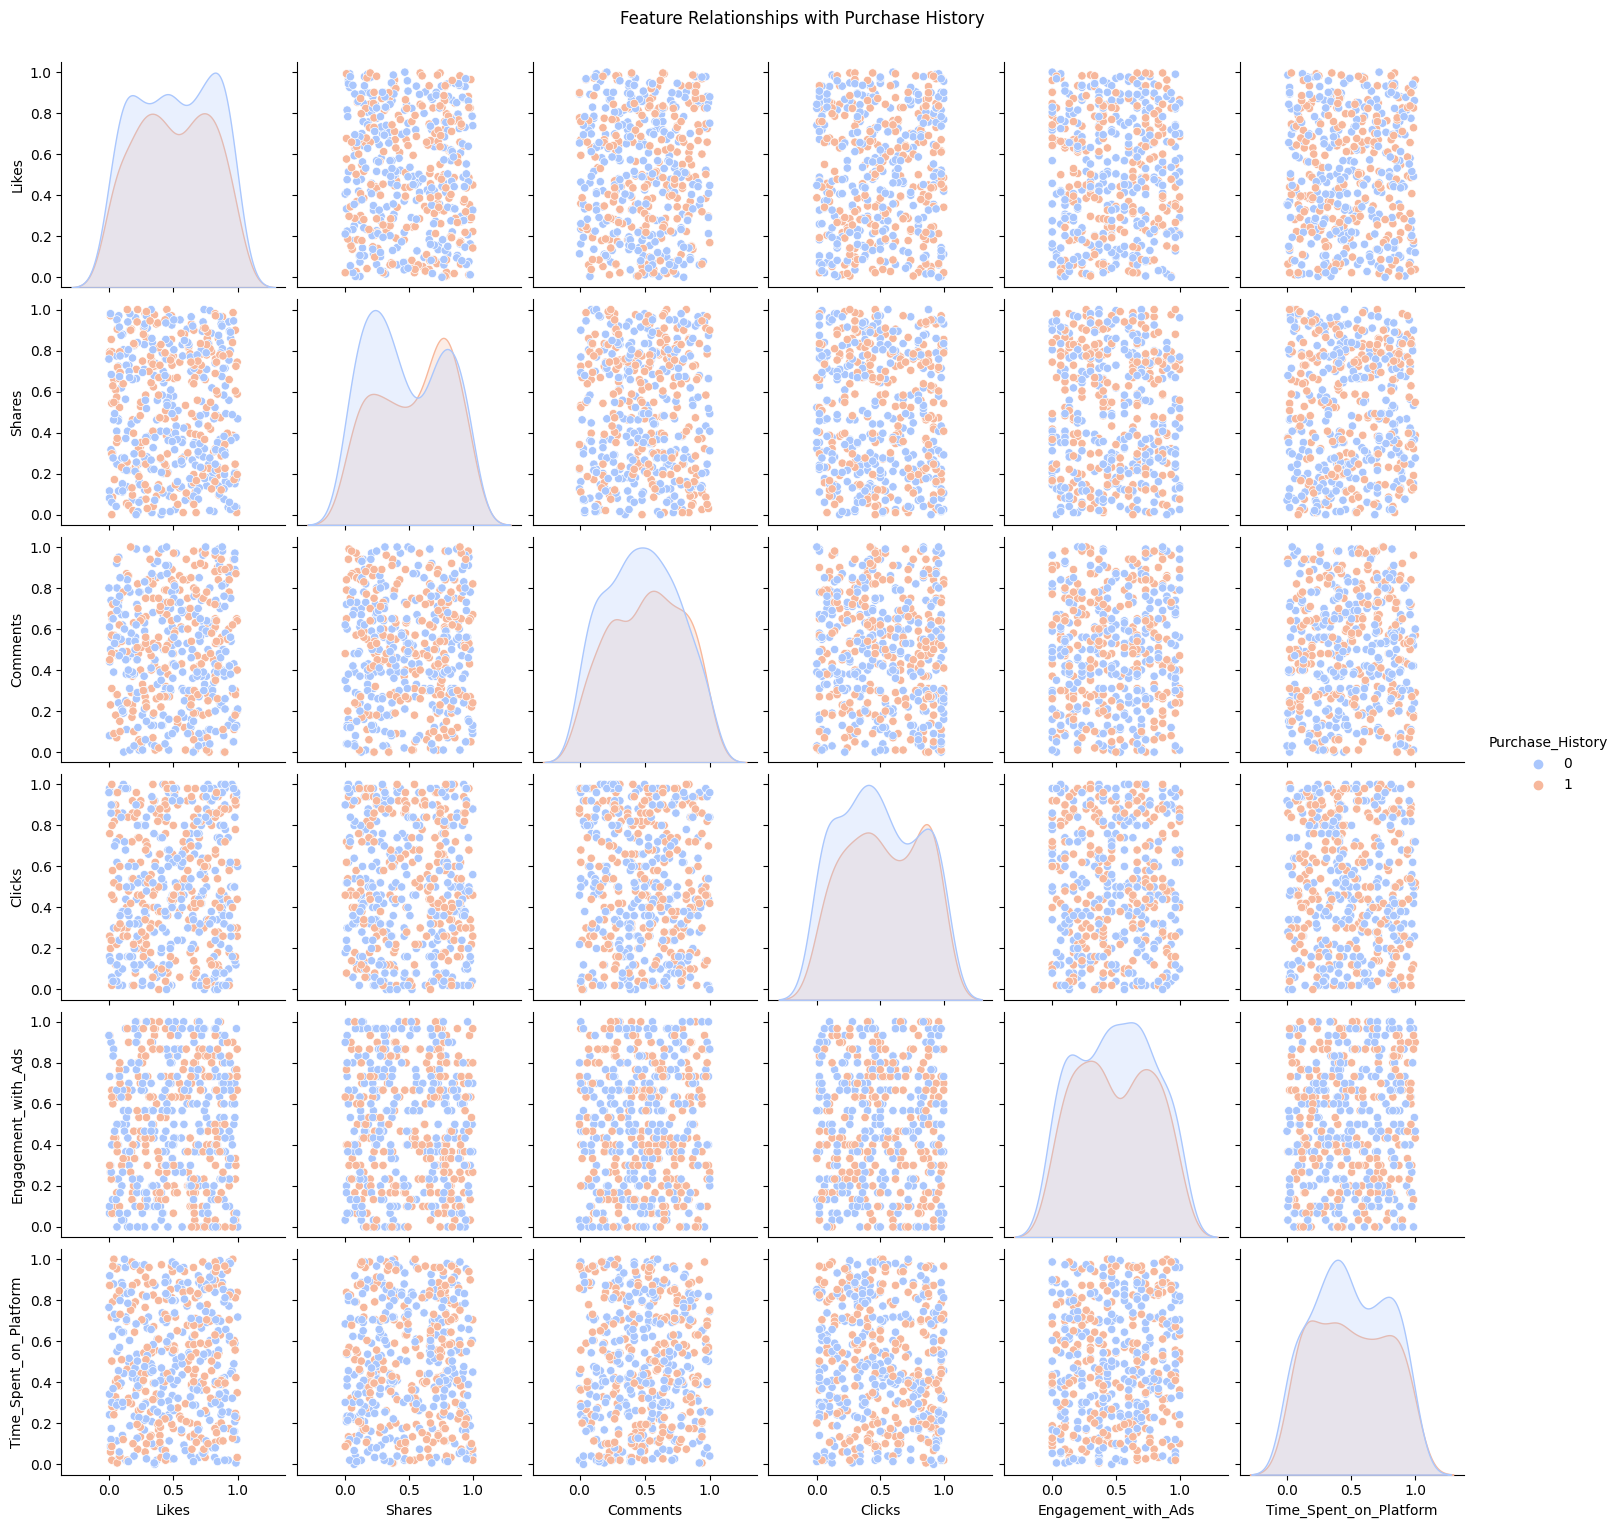

In [8]:
# Pairplot to analyze relationships
sns.pairplot(df, vars=numeric_cols, hue='Purchase_History', diag_kind='kde', palette='coolwarm')
plt.suptitle('Feature Relationships with Purchase History', y=1.02)
plt.show()


### Task 8: Outlier Detection
Use boxplots to identify potential outliers in numerical columns.


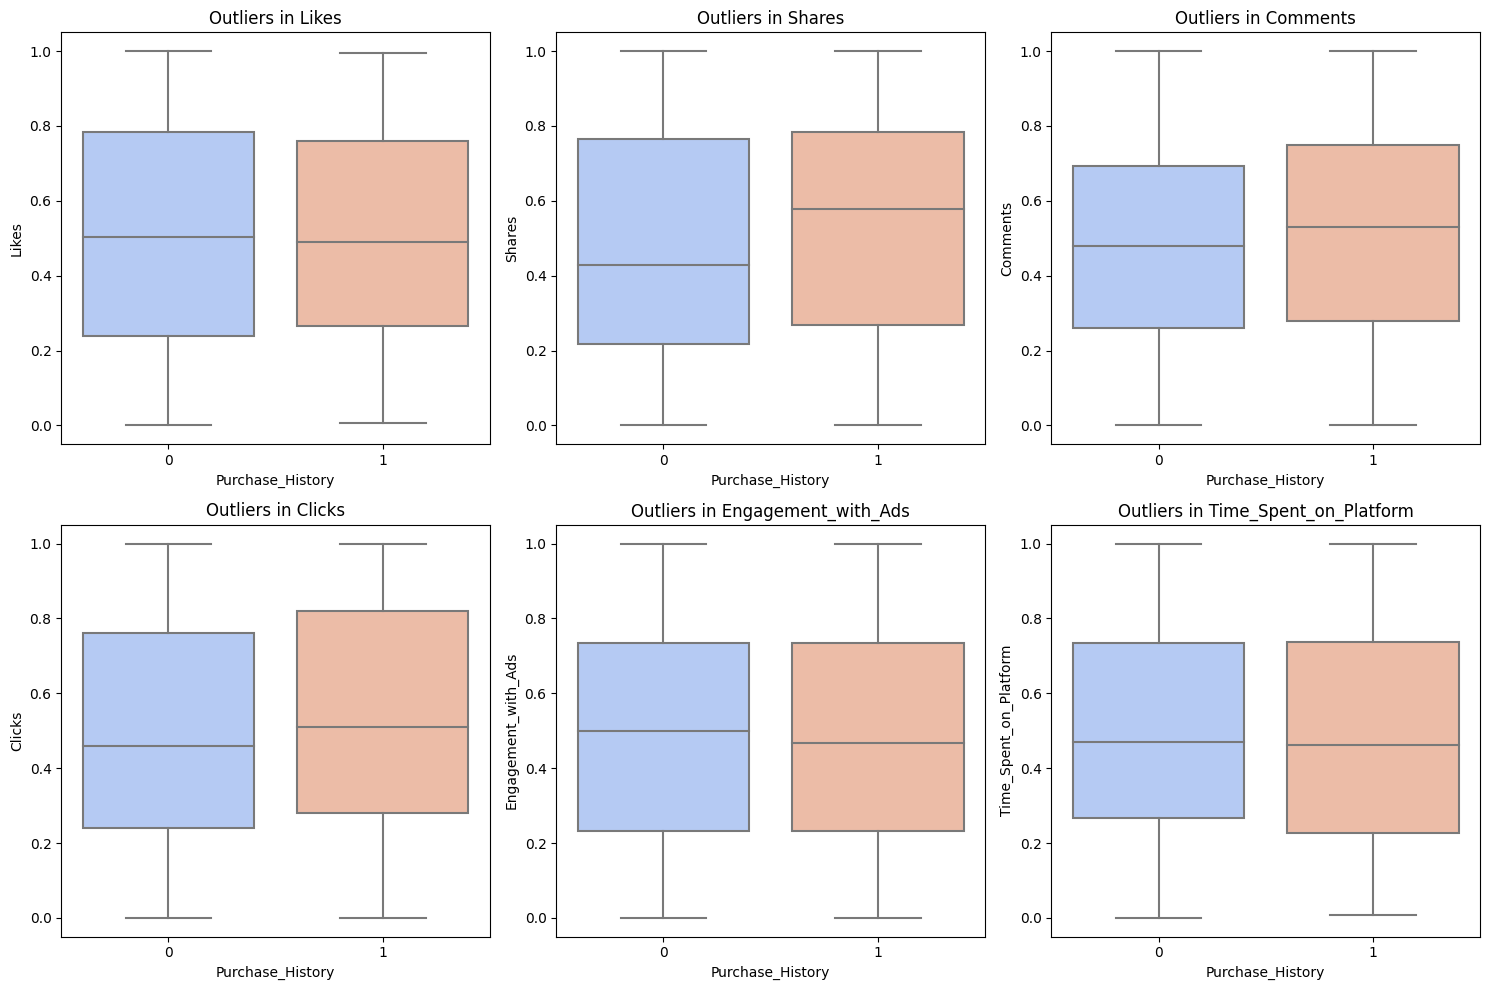

In [9]:
# Boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Purchase_History', y=col, palette='coolwarm')
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()


### Task 9: Trend of Time Spent by Engagement Level
Visualize how `Time_Spent_on_Platform` varies across different `Engagement_Level` categories.


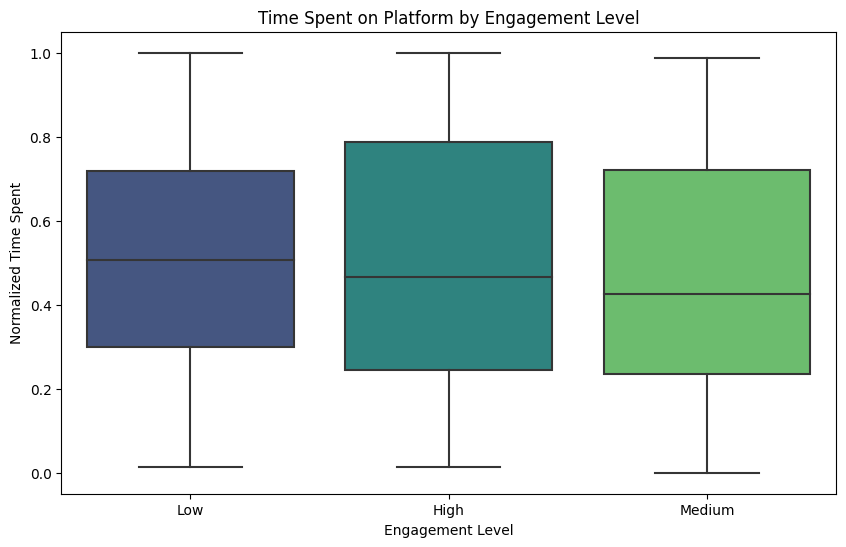

In [10]:
# Boxplot of time spent by engagement level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Engagement_Level', y='Time_Spent_on_Platform', palette='viridis')
plt.title('Time Spent on Platform by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Normalized Time Spent')
plt.show()


### Task 10: Purchase Likelihood by Engagement Level
Analyze the likelihood of purchase for users grouped by their `Engagement_Level`.


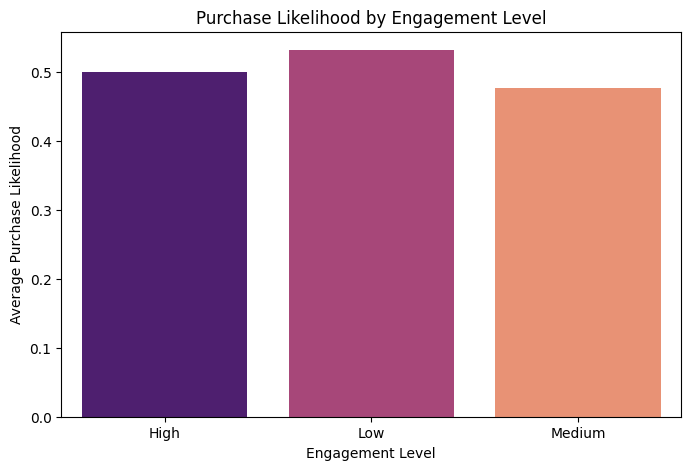

In [11]:
# Grouped barplot for purchase likelihood
purchase_likelihood = df.groupby('Engagement_Level')['Purchase_Likelihood'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=purchase_likelihood.index, y=purchase_likelihood.values, palette='magma')
plt.title('Purchase Likelihood by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Average Purchase Likelihood')
plt.show()


### Task 11: Relationship Between Time Spent and Purchase Likelihood
Analyze whether time spent on the platform correlates with a higher likelihood of purchase.


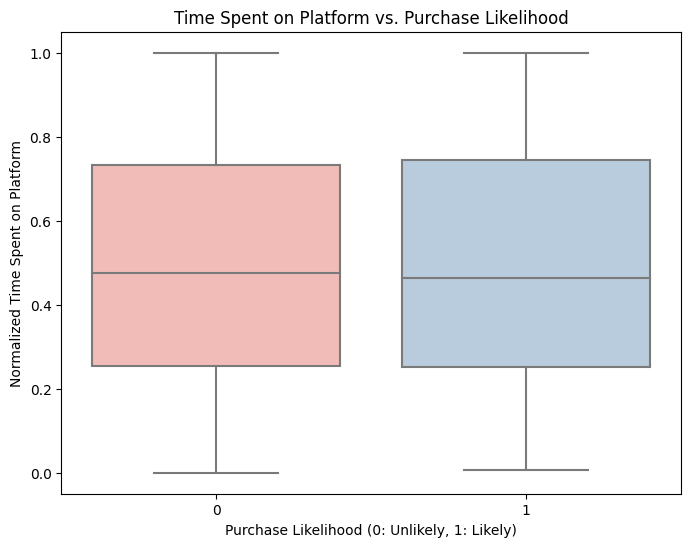

In [12]:
# Relationship Between Time Spent and Purchase Likelihood
plt.figure(figsize=(8, 6))
sns.boxplot(x='Purchase_Likelihood', y='Time_Spent_on_Platform', data=df, palette='Pastel1')
plt.title('Time Spent on Platform vs. Purchase Likelihood')
plt.xlabel('Purchase Likelihood (0: Unlikely, 1: Likely)')
plt.ylabel('Normalized Time Spent on Platform')
plt.show()


### Task 12: Trend Analysis of Likes, Shares, and Comments
Explore the relationship between likes, shares, and comments to understand how user interactions are related.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable 

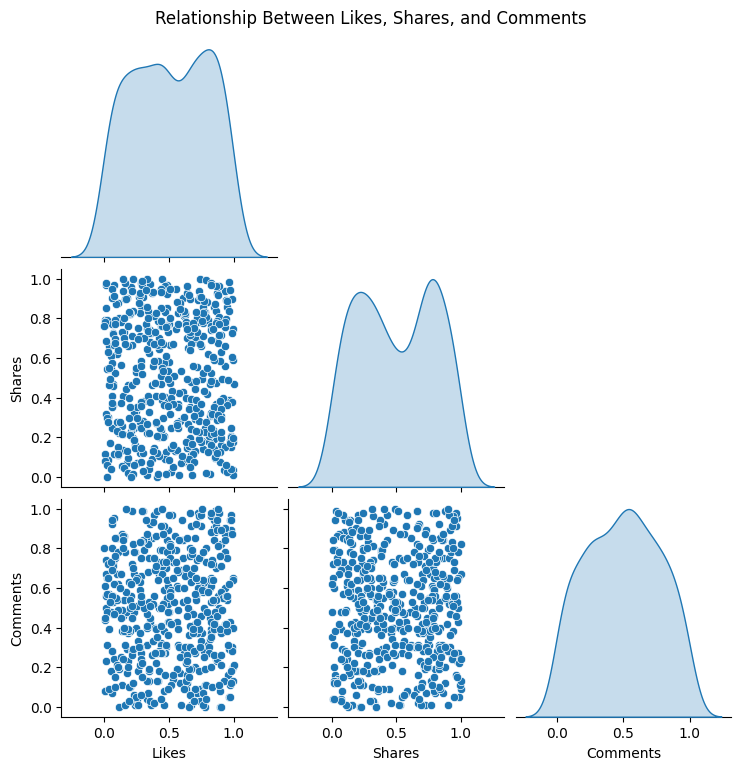

In [13]:
# Pairplot for Likes, Shares, and Comments
sns.pairplot(df[['Likes', 'Shares', 'Comments']], diag_kind='kde', corner=True, palette='Set2')
plt.suptitle('Relationship Between Likes, Shares, and Comments', y=1.02)
plt.show()
